In [ ]:
# Import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial import distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text1 = """
Artificial intelligence (AI) is revolutionizing the way we interact with technology. From natural language processing to image recognition, AI applications are becoming increasingly integrated into our daily lives. Machine learning, a subset of AI, empowers systems to learn and improve from experience without being explicitly programmed.

Deep learning, a sophisticated branch of machine learning, mimics the human brain's neural networks. This allows AI models to make complex decisions, understand patterns, and even generate creative content. Neural networks, comprising layers of interconnected nodes, enable the development of advanced AI capabilities like speech recognition and autonomous vehicles.

As AI technologies advance, ethical considerations become paramount. Ensuring responsible AI development involves addressing biases in algorithms, maintaining transparency, and safeguarding privacy. Collaboration between technologists, policymakers, and ethicists is essential to navigate the ethical challenges posed by AI.

The intersection of AI and healthcare is particularly promising. AI applications in medical diagnostics, personalized treatment plans, and drug discovery hold the potential to revolutionize healthcare delivery. Predictive analytics powered by AI can aid in early disease detection and improve patient outcomes.
a
In conclusion, the rapid evolution of artificial intelligence has transformative implications across various domains. As we embrace the capabilities of AI, it is crucial to prioritize ethical considerations and harness its power for the betterment of society.
"""


In [ ]:
text2 = """
Machine learning algorithms analyze vast amounts of data to uncover patterns and make predictions. In the realm of finance, these algorithms play a crucial role in fraud detection, risk assessment, and algorithmic trading. The ability of machine learning models to analyze financial data quickly and accurately provides a competitive advantage to financial institutions.

Natural language processing (NLP) is another domain where machine learning shines. Sentiment analysis of social media data, language translation, and chatbot interactions are just a few examples of NLP applications. These technologies enhance user experiences and streamline communication processes.

The advent of reinforcement learning has led to breakthroughs in areas like robotics and gaming. Algorithms learn by trial and error, improving their performance over time. This has practical applications in creating autonomous robots and optimizing strategies in games.

Despite the progress, challenges remain. The responsible and ethical use of machine learning requires careful consideration of biases in training data and transparent decision-making processes. Ongoing research and collaboration are essential to address these challenges and unlock the full potential of machine learning.

In summary, machine learning continues to reshape industries and drive innovation. Its applications extend across finance, language processing, robotics, and beyond. As we navigate the evolving landscape of machine learning, a thoughtful and ethical approach is vital to harness its benefits responsibly.
"""

In [ ]:
# Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove Numbers,punctuation or special characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords  like: is,a,an,the,and,in
    return tokens

In [ ]:
tokens_text1 = tokenize_text(text1)
tokens_text2 = tokenize_text(text2)

In [ ]:
word2vec_model= Word2Vec([tokens_text1,tokens_text2], vector_size=50, window=5, min_count=1, workers=4, epochs=500)  ##trainig sample

In [ ]:
embedding_doc1 = np.mean([word2vec_model.wv[word] for word in tokens_text1], axis=0)
embedding_doc2 = np.mean([word2vec_model.wv[word] for word in tokens_text2], axis=0)    # to represent in vector space(Weights)

In [ ]:
word_embedding_doc1= {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

In [ ]:
word_embedding_doc1

{'ai': array([-0.05502855,  0.12694609,  0.5190645 , -0.94253767, -0.4847101 ,
        -0.4339663 ,  0.5344339 ,  1.0510671 , -0.72334325, -0.4257415 ,
         0.05534263, -1.078698  ,  0.50974506,  0.33269256,  0.3519542 ,
        -0.18247148,  0.54052186, -0.44307637, -1.1473166 , -0.4327575 ,
        -0.26286376,  0.2947794 ,  0.76183563,  0.4708276 ,  0.6383205 ,
        -0.796745  ,  0.04194421, -0.28877306, -0.7339873 , -0.21303047,
         0.1028339 ,  0.8185522 ,  0.45483518,  0.11857635, -0.1593125 ,
        -0.5415482 ,  0.81797916,  0.11268718, -0.07414185, -0.7258999 ,
         0.9288046 ,  0.7770082 ,  0.02593581, -0.8552252 , -0.03345949,
         0.24087219, -0.42435402,  0.66131896,  0.4699406 ,  0.44236082],
       dtype=float32),
 'learning': array([-0.3865212 , -0.12643671,  0.2024648 ,  0.5159027 ,  1.2525313 ,
        -0.83649117,  0.61157066,  0.15948741, -0.16953325,  0.1668763 ,
        -0.27108866,  0.15295608, -0.7365793 , -0.27124977,  0.47242558,
         

In [ ]:
word_embedding_doc2 = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

In [ ]:
word_embedding_doc2

{'ai': array([-0.05502855,  0.12694609,  0.5190645 , -0.94253767, -0.4847101 ,
        -0.4339663 ,  0.5344339 ,  1.0510671 , -0.72334325, -0.4257415 ,
         0.05534263, -1.078698  ,  0.50974506,  0.33269256,  0.3519542 ,
        -0.18247148,  0.54052186, -0.44307637, -1.1473166 , -0.4327575 ,
        -0.26286376,  0.2947794 ,  0.76183563,  0.4708276 ,  0.6383205 ,
        -0.796745  ,  0.04194421, -0.28877306, -0.7339873 , -0.21303047,
         0.1028339 ,  0.8185522 ,  0.45483518,  0.11857635, -0.1593125 ,
        -0.5415482 ,  0.81797916,  0.11268718, -0.07414185, -0.7258999 ,
         0.9288046 ,  0.7770082 ,  0.02593581, -0.8552252 , -0.03345949,
         0.24087219, -0.42435402,  0.66131896,  0.4699406 ,  0.44236082],
       dtype=float32),
 'learning': array([-0.3865212 , -0.12643671,  0.2024648 ,  0.5159027 ,  1.2525313 ,
        -0.83649117,  0.61157066,  0.15948741, -0.16953325,  0.1668763 ,
        -0.27108866,  0.15295608, -0.7365793 , -0.27124977,  0.47242558,
         

In [ ]:
# Calculate Similarity Measures
cosine_similarity_matrix = cosine_similarity([embedding_doc1,embedding_doc2])
# Cosine similarity ranges from -1 to 1, where 1 indicates identical direction (complete similarity),
#  0 indicates orthogonality (no similarity), and
#   -1 indicates completely opposite directions (complete dissimilarity).

In [ ]:
cosine_similarity_matrix

array([[0.99999994, 0.7625217 ],
       [0.7625217 , 0.99999994]], dtype=float32)

In [ ]:
cosine_similarity_measure = cosine_similarity_matrix[0, 1]
print("Cosine Similarity Value between text1 and text2:", cosine_similarity_measure)

Cosine Similarity Value between text1 and text2: 0.7625217


In [ ]:
# Jaccard Similarity
set_tokens_text1 = set(tokens_text1)
set_tokens_text2 = set(tokens_text2)
jaccard_similarity = len(set_tokens_text1.intersection(set_tokens_text2)) / len(set_tokens_text1.union(set_tokens_text2))

print("Jaccard Similarity:", jaccard_similarity)   #Range[0,1]

# This similarity measure ranges from 0 to 1, where 0 indicates no similarity (no common elements)
#  and 1 indicates complete similarity (all elements are common).

Jaccard Similarity: 0.12322274881516587


In [ ]:
# Jaccard Similarity Matrix
jaccard_similarity_matrix = np.zeros((2, 2))

# Calculate Jaccard Similarity
for i, tokens_i in enumerate([tokens_text1, tokens_text2]):
    set_tokens_i = set(tokens_i)
    for j, tokens_j in enumerate([tokens_text1, tokens_text2]):
        set_tokens_j = set(tokens_j)
        jaccard_similarity_matrix[i, j] = len(set_tokens_i.intersection(set_tokens_j)) / len(set_tokens_i.union(set_tokens_j))

print("Jaccard Similarity Matrix:")
print(jaccard_similarity_matrix)

Jaccard Similarity Matrix:
[[1.         0.12322275]
 [0.12322275 1.        ]]


In [ ]:
euclidean_distance_matrix = euclidean_distances([embedding_doc1,embedding_doc2])
euclidean_distance_value=euclidean_distance_matrix[0][1]
euclidean_distance_matrix

array([[0.       , 2.0377185],
       [2.0377185, 0.       ]], dtype=float32)

In [ ]:
print("Cosine Similarity Value between text1 and text2:", cosine_similarity_measure)
print("Jaccard Similarity:", jaccard_similarity)
print("Euclidean distance:", euclidean_distance_value)

Cosine Similarity Value between text1 and text2: 0.7625217
Jaccard Similarity: 0.12322274881516587
Euclidean distance: 2.0377185


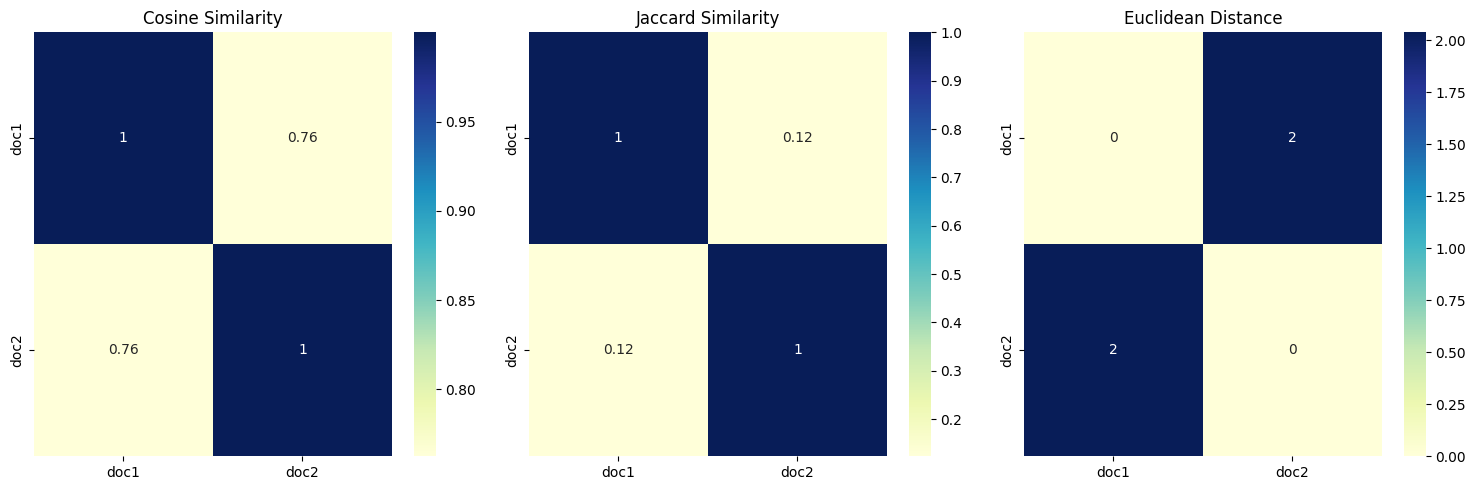

In [ ]:
# Define the document labels
doc_labels = ['doc1', 'doc2']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Heatmap: Cosine Similarity
plt.subplot(1, 3, 1)
sns.heatmap(cosine_similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=doc_labels, yticklabels=doc_labels)
plt.title("Cosine Similarity")

# Heatmap: Jaccard Similarity
plt.subplot(1, 3, 2)
sns.heatmap(jaccard_similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=doc_labels, yticklabels=doc_labels)
plt.title("Jaccard Similarity")

# Heatmap: Euclidean Distance
plt.subplot(1, 3, 3)
sns.heatmap(euclidean_distance_matrix, annot=True, cmap="YlGnBu", xticklabels=doc_labels, yticklabels=doc_labels)
plt.title("Euclidean Distance")

plt.tight_layout()
plt.show()


In [ ]:
mds_cosine = MDS(n_components=2, dissimilarity="precomputed",random_state=42,normalized_stress=False)
mds_jaccard = MDS(n_components=2, dissimilarity="precomputed",random_state=42,normalized_stress=False)
mds_euclidean = MDS(n_components=2, dissimilarity="precomputed",random_state=42,normalized_stress=False)

mds_cosine_result = mds_cosine.fit_transform(1-cosine_similarity_matrix)
# In the context of MDS, we often want a dissimilarity measure, so subtracting from 1 transforms it to a dissimilarity measure.
mds_jaccard_result = mds_jaccard.fit_transform(1 - jaccard_similarity_matrix)
#
#  for MDS, we  want to convert it to a dissimilarity measure, and subtracting from 1
mds_euclidean_result = mds_euclidean.fit_transform(euclidean_distance_matrix)
#  Euclidean distance is naturally a dissimilarity measure, so We don't need to subtract it from 1.

In [ ]:
print(mds_cosine_result)

[[-0.0845976   0.08332007]
 [ 0.0845976  -0.08332007]]


In [ ]:
print(mds_jaccard_result)


[[-0.31233694  0.30762026]
 [ 0.31233694 -0.30762026]]


In [ ]:
print(mds_euclidean_result)

[[-0.72590247  0.71494043]
 [ 0.72590247 -0.71494043]]


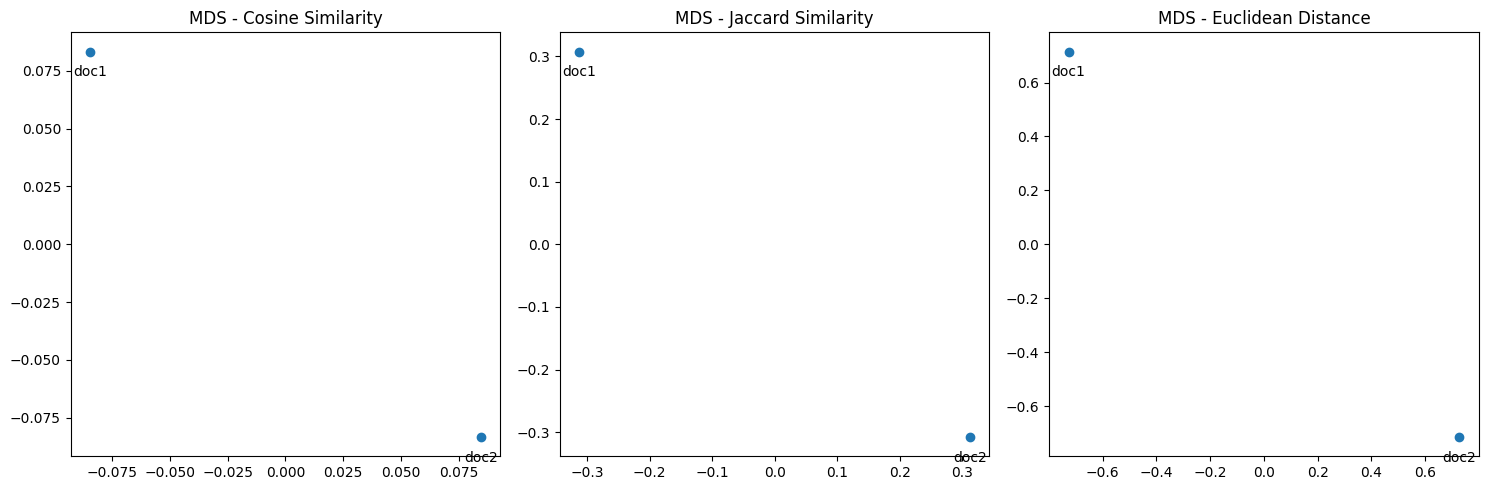

In [ ]:
# MDS Plots
doc_labels = ['doc1', 'doc2']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MDS Plot: Cosine Similarity
axes[0].scatter(mds_cosine_result[:, 0], mds_cosine_result[:, 1])
for i, label in enumerate(doc_labels):
    axes[0].annotate(label, (mds_cosine_result[i, 0], mds_cosine_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='center', va='top')
axes[0].set_title("MDS - Cosine Similarity")

# MDS Plot: Jaccard Similarity
axes[1].scatter(mds_jaccard_result[:, 0], mds_jaccard_result[:, 1])
for i, label in enumerate(doc_labels):
    axes[1].annotate(label, (mds_jaccard_result[i, 0], mds_jaccard_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='center', va='top')
axes[1].set_title("MDS - Jaccard Similarity")

# MDS Plot: Euclidean Distance
axes[2].scatter(mds_euclidean_result[:, 0], mds_euclidean_result[:, 1])
for i, label in enumerate(doc_labels):
    axes[2].annotate(label, (mds_euclidean_result[i, 0], mds_euclidean_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='center', va='top')
axes[2].set_title("MDS - Euclidean Distance")

plt.tight_layout()
plt.show()

In [ ]:
# Function to select a subset of words for visualization
def select_subset(words, max_words=10):
    if len(words) <= max_words:
        return words
    else:
        return words[:max_words]

subset_tokens_text1 = select_subset(tokens_text1)
subset_tokens_text2 = select_subset(tokens_text2)

In [ ]:
# Subset similarity matrices
subset_cosine_similarity_matrix = cosine_similarity(
    [word_embedding_doc1[word] for word in subset_tokens_text1],
    [word_embedding_doc2[word] for word in subset_tokens_text2]
)

subset_jaccard_similarity_matrix = np.zeros((len(subset_tokens_text1), len(subset_tokens_text2)))
for i, token1 in enumerate(subset_tokens_text1):
    for j, token2 in enumerate(subset_tokens_text2):
        subset_jaccard_similarity_matrix[i, j] = len(set(token1).intersection(set(token2))) / len(set(token1).union(set(token2)))

subset_euclidean_distance_matrix = np.zeros((len(subset_tokens_text1), len(subset_tokens_text2)))
for i, embedding1 in enumerate([word_embedding_doc1[word] for word in subset_tokens_text1]):
    for j, embedding2 in enumerate([word_embedding_doc2[word] for word in subset_tokens_text2]):
        subset_euclidean_distance_matrix[i, j] = distance.euclidean(embedding1, embedding2)


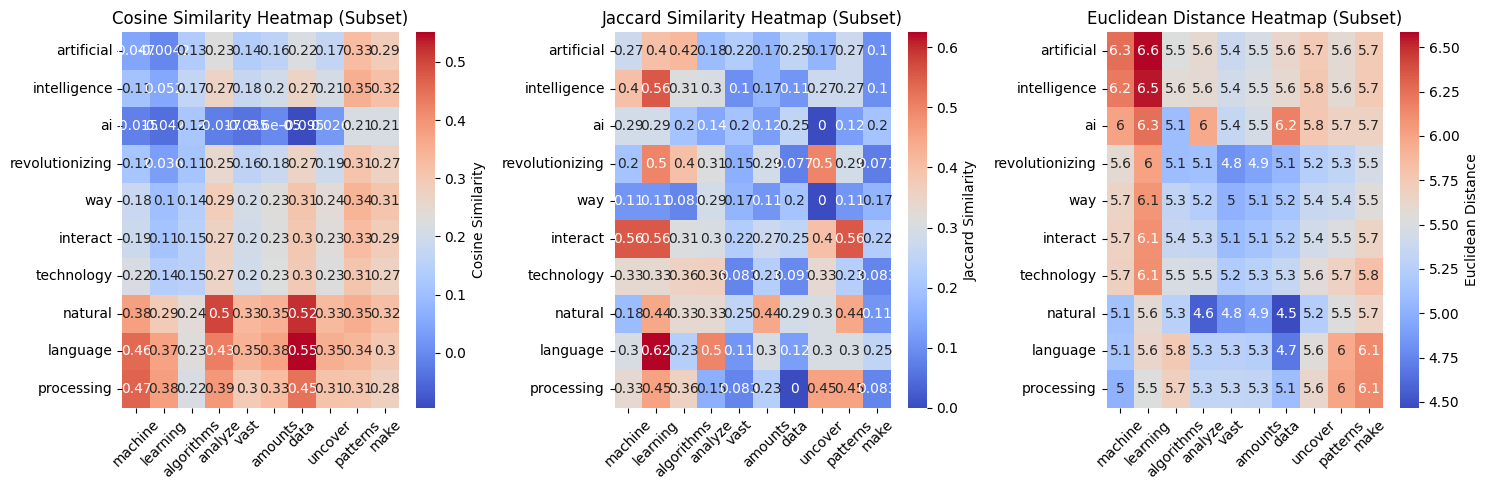

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(subset_cosine_similarity_matrix, annot=True, cmap="coolwarm", xticklabels=subset_tokens_text2, yticklabels=subset_tokens_text1, ax=axes[0], cbar_kws={'label': 'Cosine Similarity'})
axes[0].set_title("Cosine Similarity Heatmap (Subset)")

sns.heatmap(subset_jaccard_similarity_matrix, annot=True, cmap="coolwarm", xticklabels=subset_tokens_text2, yticklabels=subset_tokens_text1, ax=axes[1], cbar_kws={'label': 'Jaccard Similarity'})
axes[1].set_title("Jaccard Similarity Heatmap (Subset)")

sns.heatmap(subset_euclidean_distance_matrix, annot=True, cmap="coolwarm", xticklabels=subset_tokens_text2, yticklabels=subset_tokens_text1, ax=axes[2], cbar_kws={'label': 'Euclidean Distance'})
axes[2].set_title("Euclidean Distance Heatmap (Subset)")

# Rotate tick labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


In [ ]:
# Perform Multidimensional Scaling (MDS) on the similarity matrices
mds_cosine = MDS(n_components=2, random_state=42)
mds_cosine_result = mds_cosine.fit_transform(subset_cosine_similarity_matrix)

mds_jaccard = MDS(n_components=2, random_state=42)
mds_jaccard_result = mds_jaccard.fit_transform(subset_jaccard_similarity_matrix)

mds_euclidean = MDS(n_components=2, random_state=42)
mds_euclidean_result = mds_euclidean.fit_transform(subset_euclidean_distance_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalize

In [ ]:
print("Size of mds_cosine_result:", mds_cosine_result.shape)
print("Size of subset_tokens_text1:", len(subset_tokens_text1))
print("Size of subset_tokens_text2:", len(subset_tokens_text2))

Size of mds_cosine_result: (10, 2)
Size of subset_tokens_text1: 10
Size of subset_tokens_text2: 10


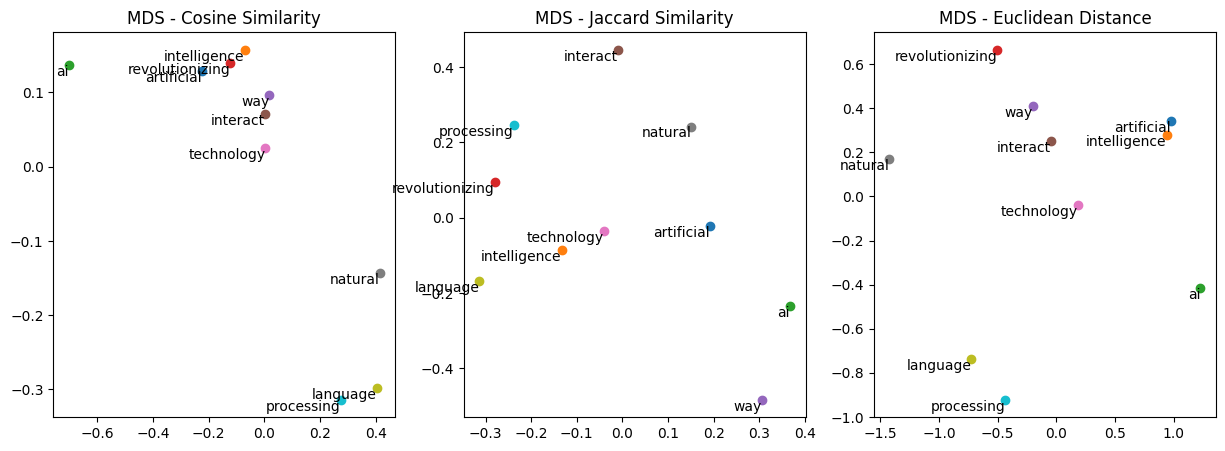

In [ ]:
# Visualize MDS results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plots for MDS results
for i in range(len(subset_tokens_text1)):
    # Cosine Similarity
    axes[0].scatter(mds_cosine_result[i, 0], mds_cosine_result[i, 1])
    axes[0].annotate(f"{subset_tokens_text1[i]}", (mds_cosine_result[i, 0], mds_cosine_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='right', va='bottom')



    # Jaccard Similarity
    axes[1].scatter(mds_jaccard_result[i, 0], mds_jaccard_result[i, 1], label=f"Text1_{i}")
    axes[1].annotate(f"{subset_tokens_text1[i]}", (mds_jaccard_result[i, 0], mds_jaccard_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='right', va='bottom')


    # Euclidean Distance
    axes[2].scatter(mds_euclidean_result[i, 0], mds_euclidean_result[i, 1], label=f"Text1_{i}")
    axes[2].annotate(f"{subset_tokens_text1[i]}", (mds_euclidean_result[i, 0], mds_euclidean_result[i, 1]), textcoords="offset points", xytext=(0, -10), ha='right', va='bottom')


axes[0].set_title("MDS - Cosine Similarity")
axes[1].set_title("MDS - Jaccard Similarity")
axes[2].set_title("MDS - Euclidean Distance")

plt.show()
